(scheme:semi-lagrangian)=
# The semi-lagrangian scheme

We have been using the linear advection equation in its Eulerian form {eq}`eqAdvection`. An alternative form of this equation is 

$$
\frac{dU}{dt}=0,
$$ (eq:advectionLagrangian)

where $U(t)=u(x(t),t)$ is the quantity $u(x,t)$ carried by a particle whose trajectory is $x(t)=x(0)+ct$. Equation {eq}`eq:advectionLagrangian` is called the *Lagrangian* form of {eq}`eqAdvection` and it states that $u$ is conserved along particle trajectories.

Both forms are equivalent, as we can see if we expand {eq}`eq:advectionLagrangian`:

$$
\frac{dU}{dt}=\frac{du(x(t),t)}{dt}=\frac{\partial u}{\partial t} + \frac{\partial u}{\partial x}\frac{\partial x}{\partial t}=\frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x}=0.
$$ (eq:advectionEulerianLagrangian)

The conservation of $u$ implies that, over a time interval $[n\Delta t, (n+1)\Delta t]$,

$$
U^{n+1}=U^{n}.
$$ (eq:schemeLagrangian)

This means that if we know $U^0$, we know the all subsequent $U^n$, along the trajectories of fluid particles. However, this does not work in practice because we don't know the particle trajectories. 

A more practical approach is to "reverse" the procedure.  {numref}`fig:semiLagrangia-grid` shows a part of the t-x diagram between time steps $n$ and $n+1$ and grid positions $m-2$ to $m+2$.

```{figure} numerical-schemes-semi-lagrangian-grid.png
---
height: 400px
name: fig:semiLagrangia-grid
---
t-x diagram between time steps $n$ and $n+1$. The particle at $x_{m+2}$ at time $t^{n+1}$ was at $x_{\ast}$ at time $t^n$.
```
The value of $u_{m+2}^{n+1}$ is $U_{m+2}^{n+1}$, the value of $u$ carried by the particle that occupies $x_{m+2}$ at $t^{n+1}$. According to {eq}`eq:schemeLagrangian`, this value is $U_{\ast}^{n}$, the value of $u$ at $x_{\ast}$ at $t^n$, which is the position that the particle occupied at $t^n$. 

During one time step, the particle moves a distance $s=c\Delta t$. Let $\sigma=c\Delta t/\Delta x=1.25$ ({numref}`fig:semiLagrangia-grid`), so that $s=\sigma\Delta x=1.25\Delta x$. In general, the particle's departure point $x_{\ast}$ does not coincide with the grid nodes, so we must interpolate $u$ to find $u(x_{\ast},t^n)$.

Let $p=[\sigma]$ be the integer part of $\sigma$ and $\alpha=\sigma-p$, the fractional part of $\sigma$. In this example, $p=1$ and $\alpha=0.25$. The departure point falls between $m-p-1$ and $m-p$, and we can use linear interpolation to obtain $U_{\ast}^n$:

$$
U_{\ast}^n=\alpha u_{m-p-1}^n + (1-\alpha)u_{m-p}^n=u_{m+2}^{n+1}, 
$$

which is $u_{m+2}^{n+1}$ because of {eq}`eq:schemeLagrangian`. 

## Stability of semi-lagragian schemes

The semi-lagrangian scheme can be written as

$$
U_{m}^{n+1}=\alpha U_{m-p-1}^n + (1-\alpha)U_{m-p}^n. 
$$ (eq:semiLagrangian)

Let us assume a solution like

$$
U_m^n=B^ne^{i\lambda m\Delta x}
$$

and replace it in {eq}`eq:semiLagrangian`. After removing the common term $e^{i\lambda m\Delta x}$, we obtain

$$
\frac{B^{n+1}}{B^n} = \alpha e^{i\lambda (-p-1)\Delta x} + (1-\alpha)e^{i\lambda (-p)\Delta x} \\
= e^{i\lambda (-p)\Delta x}[(1-\alpha)+\alpha e^{-i\lambda\Delta x}].
$$

For the scheme to be stable we need that $|B^{n+1}/B^n|\leq 1$. This can be easily checked:

$$
\left|\frac{B^{n+1}}{B^n}\right|^2 &= |e^{i\lambda (-p)\Delta x}|^2|(1-\alpha)+\alpha e^{-i\lambda\Delta x}|^2 \\
&=|(1-\alpha)+\alpha(\cos \lambda \Delta x-i\sin\lambda\Delta x)|^2 \\
&=1-2\alpha(1-\alpha)[1-\cos\lambda \Delta x].
$$

For all $\theta$, $0\leq 1 - \cos\theta \leq 2$, so in the worst case scenario, we shall have

$$
\left|\frac{B^{n+1}}{B^n}\right|^2 = 1-4\alpha(1-\alpha)=(1-2\alpha)^2\leq 1, \quad 0<\alpha<1.
$$

For $1-\cos\lambda \Delta x=0$, we shall have $|B^{n+1}/B^n|^2=1$. In either case,

$$
\left|\frac{B^{n+1}}{B^n}\right|^2 \leq 1,
$$

so the semi-Lagrangian scheme is unconditionally stable. 

```{figure} stability-semi-lagrangian.png
---
height: 400px
name: fig:stability-semi-lagrangian
---
t-x diagram of the Leapfrog and semi-Lagrangian schemes for the linear advection equation, with $\Delta t=4$, $\Delta x=3$ and $c=2$. 
```

The unconditional stability of the semi-Lagragian scheme comes from the fact that the *physical* domain of dependence of the solution is always contained in the *numerical* domain of dependence of the scheme. Consider the situation in {numref}`fig:stability-semi-lagrangian`, that represents the t-x diagram of a model where the Leafrog scheme and the semi-Lagrangian are employed to solve the linear advection equation .

At time step $n+1$, the Leapfrog scheme is unstable because $\sigma=c\Delta t/\Delta x>1$. This is visible in the diagram because the characteristic line that goes through $x_m^{n+1}$ does not fall within the numerical domain of dependence of the Leapfrog scheme. The characteristics lines are the physical domain of dependence since the solution of the linear advection equation propagates along them. 

For the semi-Lagrangian scheme the situation is different. As the particle moves along the characteristic line, the departure point $x_{\ast}^n$ will always fall on the intersection of the characteristic line with the spatial grid $x_m$ of the previous time step. Since all values of $u_m^n$, the physical domain of dependence will always be between two know values of the solution, which can then be interpolated to find $u_{\ast}^n$.

## Application: propagation of top hat function

To test the scheme, we are going to apply it to the propagation of the top hat signal.

In [1]:
def topHat(x):
   f0=np.zeros(x.shape)
   f0[(x>0.45) & (x<0.55)]=1

   return f0

The Semi-lagrangian scheme is implemented in the following Python function:

In [2]:
def semiLagrangian(u0,c,dt,dx,N,M):

    # Store initial condition
    u=u0.copy()

    # Initial positions in grid coordinates m=1:M
    m=np.arange(0,M).astype(int)#x0.copy()

    C = c*dt/dx

    p=np.floor(C).astype(int)

    alpha = C - p

    for n in range(N):
        
        m1=(m-p-1)%M
        
        m2=(m1+1)%M
        
        u_minus = (1-alpha)*u[m2] + alpha*u[m1]
    
        # Forward transport
        u = u_minus

    return u

In the next code snippet, we set the discretization parameters and integrate the initial condition with the Upwind scheme:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

N     = 30       # Number of time steps
M     = 200      # Number of grid points
c     = 0.75     # Propagation speed

dt = 0.01
dx = 1/M

print("Number of time steps = {:d}".format(N))
print("Number of grid points = {:d}".format(M))
print("Time step = {:f}".format(dt))
print("Grid size = {:f}".format(dx))
print("CFL number = {:f}".format(c*dt/dx))

# Grid points
X=np.linspace(0,1,M)

# Integrate the initial condition N time steps
U=semiLagrangian(topHat(X),c,dt,dx,N,M)

Number of time steps = 30
Number of grid points = 200
Time step = 0.010000
Grid size = 0.005000
CFL number = 1.500000


The solution at the end of the integration is shown below:

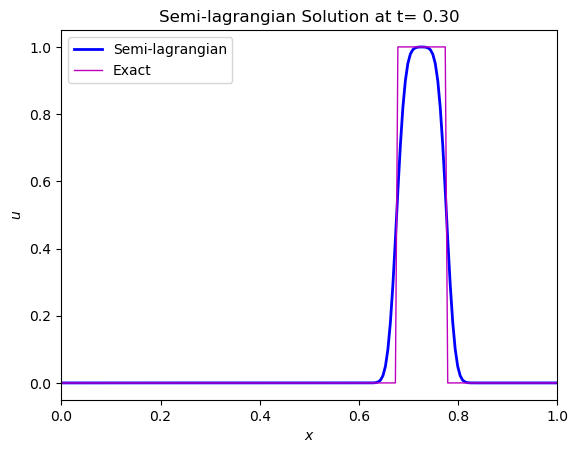

In [4]:
# Shift the exact solution a distance equivalent to c*N*dt
newX = np.mod(X-c*N*dt,1)

fig, ax0 = plt.subplots()

ax0.plot(X, U, lw = 2, color = "b",  label='Semi-lagrangian')
ax0.plot(X, topHat(newX), lw = 1, color = "m",  label='Exact')

ax0.set_title("Semi-lagrangian Solution at t={:5.2f}".format(N*dt))
ax0.set_xlabel('$x$')
ax0.set_xlim([0, 1])
ax0.set_ylabel('$u$')
ax0.legend()

plt.show()

We can observe that the Semi-lagrangian scheme is stable for CFL>1, however dissipative behaviour is observable, due to the first order treatment of the spatial derivatives in the implementation of the scheme.